In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import seaborn as sns

In [2]:

df = pd.read_csv("ComplainantDetailsData.csv")

In [3]:
df

,District_Name,UnitName,FIRNo,Year,Month,ComplainantName,Relation,RelationshipName,DateOfBirth,Age,...,Occupation,Address,City,State,Pincode,Caste,Religion,FIR_ID,Unit_ID,Complaint_ID
0,Bagalkot,Amengad PS,0001/2016,2016,1,BASAYYA HIREMATH,Father,SHANKRAYYA,1900-01-01 00:00:00.000,40,...,Labourer,"HUVINAHALLI,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,Lingayath,Hindu,2016000002,1245,2016000002
1,Bagalkot,Amengad PS,0002/2016,2016,1,R S BIRADAR PSI,Father,S,1900-01-01 00:00:00.000,48,...,Police officer,"AMINAGAD PS,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,NaN,Hindu,2016000003,1245,2016000003
2,Bagalkot,Amengad PS,0003/2016,2016,1,I R HADAPAD ASI,Father,R,1900-01-01 00:00:00.000,59,...,Police officer,"AMINAGAD PS,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,NaN,Hindu,2016000004,1245,2016000004
3,Bagalkot,Amengad PS,0004/2016,2016,1,MAHESH JANNU,Father,SADANAND,1900-01-01 00:00:00.000,40,...,Businessman,"BASAVA NAGAR GOKAK CTS NO 190/5 PLAT NO 02,TQ-...",Belagavi Dist,Karnataka,NaN,BRAHMIN,Hindu,2016000005,1245,2016000005
4,Bagalkot,Amengad PS,0005/2016,2016,1,SANGANABASAPPA SHANMUKHAPPA RESHMI,NaN,NaN,1900-01-01 00:00:00.000,0,...,Teacher,"AMBLIKOPPA NOW AT ILKAL,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,GANIGA,Hindu,2016000006,1245,2016000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696387,Yadgir,Yadgiri Women PS,0002/2024,2024,1,Gnanamithra,Father,Simeon,1900-01-01 00:00:00.000,58,...,Public Sector Undertaking,"R/o Hosalli Cross Near Ratanam School,yadgiri",Yadgir,Karnataka,NaN,NaN,Christian,2024000002,2183,2024000002
1696388,Yadgir,Yadgiri Women PS,0003/2024,2024,1,Sharbanna,Father,Sabanna Sadoor,1900-01-01 00:00:00.000,55,...,Labourer,",",Yadgir,Karnataka,NaN,"HOLAYA, HOLER, HOLEYA",Hindu,2024000003,2183,2024000003
1696389,Yadgir,Yadgiri Women PS,0004/2024,2024,2,Smt Sunita,Husband,Sharbanna Mathpalli,1900-01-01 00:00:00.000,29,...,Teacher,"R/o Bilahar Village,tq wadageri dist yadgir",Yadgir,Karnataka,NaN,Lingayath,Hindu,2024000004,2183,2024000004
1696390,Yadgir,Yadgiri Women PS,0005/2024,2024,2,Sruthi,Husband,Sharnabasava Sahubangari,1900-01-01 00:00:00.000,29,...,House help - hired,"R/o Thanagundi Village,now at Oppoiste Mini Vi...",Yadgir,Karnataka,NaN,REDDY,Hindu,2024000005,2183,2024000005


In [4]:
df.District_Name.unique()

array(['Bagalkot', 'Ballari', 'Belagavi City', 'Belagavi Dist',
       'Bengaluru City', 'Bengaluru Dist', 'Bidar', 'Chamarajanagar',
       'Chickballapura', 'Chikkamagaluru', 'Chitradurga', 'CID',
       'Coastal Security Police', 'Dakshina Kannada', 'Davanagere',
       'Dharwad', 'Gadag', 'Hassan', 'Haveri', 'Hubballi Dharwad City',
       'ISD Bengaluru', 'K.G.F', 'Kalaburagi', 'Kalaburagi City',
       'Karnataka Railways', 'Kodagu', 'Kolar', 'Koppal', 'Mandya',
       'Mangaluru City', 'Mysuru City', 'Mysuru Dist', 'Raichur',
       'Ramanagara', 'Shivamogga', 'Tumakuru', 'Udupi', 'Uttara Kannada',
       'Vijayanagara', 'Vijayapur', 'Yadgir'], dtype=object)

In [5]:
df.UnitName.unique()

array(['Amengad PS', 'Badami PS', 'Bagalkot CEN Crime PS', ...,
       'Yadgiri Town PS', 'Yadgiri Traffic PS', 'Yadgiri Women PS'],
      dtype=object)

In [6]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'].astype(str), errors='coerce')
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'], format = '%Y/%m/%d %S:%M:%H')

In [7]:
df.columns


Index(['District_Name', 'UnitName', 'FIRNo', 'Year', 'Month',
       'ComplainantName', 'Relation', 'RelationshipName', 'DateOfBirth', 'Age',
       'Sex', 'Nationality', 'Occupation', 'Address', 'City', 'State',
       'Pincode', 'Caste', 'Religion', 'FIR_ID', 'Unit_ID', 'Complaint_ID'],
      dtype='object')

In [8]:
df

,District_Name,UnitName,FIRNo,Year,Month,ComplainantName,Relation,RelationshipName,DateOfBirth,Age,...,Occupation,Address,City,State,Pincode,Caste,Religion,FIR_ID,Unit_ID,Complaint_ID
0,Bagalkot,Amengad PS,0001/2016,2016,1,BASAYYA HIREMATH,Father,SHANKRAYYA,1900-01-01,40,...,Labourer,"HUVINAHALLI,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,Lingayath,Hindu,2016000002,1245,2016000002
1,Bagalkot,Amengad PS,0002/2016,2016,1,R S BIRADAR PSI,Father,S,1900-01-01,48,...,Police officer,"AMINAGAD PS,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,NaN,Hindu,2016000003,1245,2016000003
2,Bagalkot,Amengad PS,0003/2016,2016,1,I R HADAPAD ASI,Father,R,1900-01-01,59,...,Police officer,"AMINAGAD PS,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,NaN,Hindu,2016000004,1245,2016000004
3,Bagalkot,Amengad PS,0004/2016,2016,1,MAHESH JANNU,Father,SADANAND,1900-01-01,40,...,Businessman,"BASAVA NAGAR GOKAK CTS NO 190/5 PLAT NO 02,TQ-...",Belagavi Dist,Karnataka,NaN,BRAHMIN,Hindu,2016000005,1245,2016000005
4,Bagalkot,Amengad PS,0005/2016,2016,1,SANGANABASAPPA SHANMUKHAPPA RESHMI,NaN,NaN,1900-01-01,0,...,Teacher,"AMBLIKOPPA NOW AT ILKAL,TQ-HUNAGUND",Bagalkot,Karnataka,NaN,GANIGA,Hindu,2016000006,1245,2016000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696387,Yadgir,Yadgiri Women PS,0002/2024,2024,1,Gnanamithra,Father,Simeon,1900-01-01,58,...,Public Sector Undertaking,"R/o Hosalli Cross Near Ratanam School,yadgiri",Yadgir,Karnataka,NaN,NaN,Christian,2024000002,2183,2024000002
1696388,Yadgir,Yadgiri Women PS,0003/2024,2024,1,Sharbanna,Father,Sabanna Sadoor,1900-01-01,55,...,Labourer,",",Yadgir,Karnataka,NaN,"HOLAYA, HOLER, HOLEYA",Hindu,2024000003,2183,2024000003
1696389,Yadgir,Yadgiri Women PS,0004/2024,2024,2,Smt Sunita,Husband,Sharbanna Mathpalli,1900-01-01,29,...,Teacher,"R/o Bilahar Village,tq wadageri dist yadgir",Yadgir,Karnataka,NaN,Lingayath,Hindu,2024000004,2183,2024000004
1696390,Yadgir,Yadgiri Women PS,0005/2024,2024,2,Sruthi,Husband,Sharnabasava Sahubangari,1900-01-01,29,...,House help - hired,"R/o Thanagundi Village,now at Oppoiste Mini Vi...",Yadgir,Karnataka,NaN,REDDY,Hindu,2024000005,2183,2024000005


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696392 entries, 0 to 1696391
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   District_Name     object        
 1   UnitName          object        
 2   FIRNo             object        
 3   Year              int64         
 4   Month             int64         
 5   ComplainantName   object        
 6   Relation          object        
 7   RelationshipName  object        
 8   DateOfBirth       datetime64[ns]
 9   Age               int64         
 10  Sex               object        
 11  Nationality       object        
 12  Occupation        object        
 13  Address           object        
 14  City              object        
 15  State             object        
 16  Pincode           float64       
 17  Caste             object        
 18  Religion          object        
 19  FIR_ID            int64         
 20  Unit_ID           int64         
 21  Complain

In [10]:
df.isnull().sum()

District_Name             0
UnitName                  0
FIRNo                     0
Year                      0
Month                     0
ComplainantName           0
Relation             485092
RelationshipName     509856
DateOfBirth               0
Age                       0
Sex                  135307
Nationality               3
Occupation           249829
Address                   0
City                     77
State                    75
Pincode             1268030
Caste                761447
Religion             530060
FIR_ID                    0
Unit_ID                   0
Complaint_ID              0
dtype: int64

In [11]:
df.Sex.unique()

array(['MALE', nan, 'FEMALE', 'Enuch'], dtype=object)

In [12]:
df.Sex.replace({'FEMALE':2,'MALE':1,'Enuch':3},inplace=True)

C:\Users\bsj\AppData\Local\Temp\ipykernel_1268\3877586115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sex.replace({'FEMALE':2,'MALE':1,'Enuch':3},inplace=True)
C:\Users\bsj\AppData\Local\Temp\ipykernel_1268\3877586115.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex.replace({'FE

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696392 entries, 0 to 1696391
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   District_Name     object        
 1   UnitName          object        
 2   FIRNo             object        
 3   Year              int64         
 4   Month             int64         
 5   ComplainantName   object        
 6   Relation          object        
 7   RelationshipName  object        
 8   DateOfBirth       datetime64[ns]
 9   Age               int64         
 10  Sex               float64       
 11  Nationality       object        
 12  Occupation        object        
 13  Address           object        
 14  City              object        
 15  State             object        
 16  Pincode           float64       
 17  Caste             object        
 18  Religion          object        
 19  FIR_ID            int64         
 20  Unit_ID           int64         
 21  Complain

In [14]:
df.Sex.isnull().sum()

135307

In [15]:
df.Sex.unique()

array([ 1., nan,  2.,  3.])

In [16]:
round_Values = round(df.Sex.mean())
df.Sex.fillna(round_Values,inplace=True)

In [17]:
df.Sex.isnull().sum()

0

In [18]:
len(df.Nationality.unique())

106

In [19]:
df = df.drop('Pincode', axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696392 entries, 0 to 1696391
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   District_Name     object        
 1   UnitName          object        
 2   FIRNo             object        
 3   Year              int64         
 4   Month             int64         
 5   ComplainantName   object        
 6   Relation          object        
 7   RelationshipName  object        
 8   DateOfBirth       datetime64[ns]
 9   Age               int64         
 10  Sex               float64       
 11  Nationality       object        
 12  Occupation        object        
 13  Address           object        
 14  City              object        
 15  State             object        
 16  Caste             object        
 17  Religion          object        
 18  FIR_ID            int64         
 19  Unit_ID           int64         
 20  Complaint_ID      int64         
dtypes: datet

In [21]:
df.isnull().sum()

District_Name            0
UnitName                 0
FIRNo                    0
Year                     0
Month                    0
ComplainantName          0
Relation            485092
RelationshipName    509856
DateOfBirth              0
Age                      0
Sex                      0
Nationality              3
Occupation          249829
Address                  0
City                    77
State                   75
Caste               761447
Religion            530060
FIR_ID                   0
Unit_ID                  0
Complaint_ID             0
dtype: int64

In [22]:
df.Relation.unique()
#df.RelationshipName.unique()

array(['Father', nan, 'Husband', 'Mother', 'Grand Daughter', 'Daughter',
       'Wife', 'Son', 'Distant relative', 'Self', 'Brother',
       'Mother-in-law', 'Grand mother', 'Friend', 'BUDDHISTS',
       'Grand father', 'Father-in-law', 'Aunt', 'Uncle', 'Neighbour',
       'Grand Son', 'Brother-in-law', 'Sister', 'Land lord', 'Guardian',
       'Business Partner', 'Sister-in-law', 'ORWARI', 'FULL MALI',
       'VOKKALIGA', 'BRAHMIN', 'HINDU SADAR', 'Others', 'HANBAR',
       'ARE MARATHA'], dtype=object)

In [23]:
d=['Relation','RelationshipName']

In [24]:
df = df.drop('Relation', axis=1)

In [25]:
df = df.drop('RelationshipName', axis=1)

In [26]:
df = df.drop('Caste', axis=1)

In [27]:
df = df.drop('Religion', axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696392 entries, 0 to 1696391
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   District_Name    object        
 1   UnitName         object        
 2   FIRNo            object        
 3   Year             int64         
 4   Month            int64         
 5   ComplainantName  object        
 6   DateOfBirth      datetime64[ns]
 7   Age              int64         
 8   Sex              float64       
 9   Nationality      object        
 10  Occupation       object        
 11  Address          object        
 12  City             object        
 13  State            object        
 14  FIR_ID           int64         
 15  Unit_ID          int64         
 16  Complaint_ID     int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(9)
memory usage: 220.0+ MB


In [29]:
df.isnull().sum()

District_Name           0
UnitName                0
FIRNo                   0
Year                    0
Month                   0
ComplainantName         0
DateOfBirth             0
Age                     0
Sex                     0
Nationality             3
Occupation         249829
Address                 0
City                   77
State                  75
FIR_ID                  0
Unit_ID                 0
Complaint_ID            0
dtype: int64

In [30]:
df.City.unique()

array(['Bagalkot', 'Belagavi Dist', 'Belagavi City', 'Gadag', 'Vijayapur',
       'Koppal', 'Hubballi Dharwad City', 'Dharwad', 'Raichur', 'Ballari',
       nan, 'Chitradurga', 'Hyderabad city', 'Bengaluru City', 'Kolhapur',
       'Vijayanagara', 'Tumakuru', 'Haveri', 'Mangaluru City', 'Sangli',
       'Yadgir', 'Nanded', 'Pune city', 'Bengaluru Dist', 'Guntur',
       'Udupi', 'Shivamogga', 'Jalore', 'Solapur rural', 'Bidar',
       'Davanagere', 'Thrissur', 'Beed', 'Anantapur', 'Jalna', 'Alwar',
       'Kalaburagi', 'Basti', 'Mysuru City', 'Agra', 'Ajmer',
       'Thiruvannamalai', 'Khargone', 'Bharatpur', 'Namakkal',
       'Aurangabad city', 'Latur', 'Srikakulam', 'Ramanagara', 'Dholpur',
       'Jhunjhunu', 'Surat rural', 'Mirzapur', 'Bijnor', 'Salem',
       'Hyderabad', 'Jalpaiguri', 'Villupuram', 'Ghazipur',
       'Tiruchirapalli', 'Ahmedabad city', 'Badwani', 'Kurnool',
       'Mumbai city', 'Nellore', 'Solapur city', 'Vellore', 'Purnea',
       'Nilgiris', 'Jaunpur', 'Hazar

In [31]:
df.dropna(subset=['City'],inplace=True)

In [32]:
df.dropna(subset=['State','Nationality'],inplace=True)

In [33]:
df.isnull().sum()

District_Name           0
UnitName                0
FIRNo                   0
Year                    0
Month                   0
ComplainantName         0
DateOfBirth             0
Age                     0
Sex                     0
Nationality             0
Occupation         249795
Address                 0
City                    0
State                   0
FIR_ID                  0
Unit_ID                 0
Complaint_ID            0
dtype: int64

In [34]:
df.dropna(subset=['Occupation'],inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446518 entries, 0 to 1696391
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   District_Name    1446518 non-null  object        
 1   UnitName         1446518 non-null  object        
 2   FIRNo            1446518 non-null  object        
 3   Year             1446518 non-null  int64         
 4   Month            1446518 non-null  int64         
 5   ComplainantName  1446518 non-null  object        
 6   DateOfBirth      1446518 non-null  datetime64[ns]
 7   Age              1446518 non-null  int64         
 8   Sex              1446518 non-null  float64       
 9   Nationality      1446518 non-null  object        
 10  Occupation       1446518 non-null  object        
 11  Address          1446518 non-null  object        
 12  City             1446518 non-null  object        
 13  State            1446518 non-null  object        
 14  FIR_ID 

In [36]:
d=len(df)
d

1446518

In [37]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
cols = df.select_dtypes(include=['object'])
cols

,District_Name,UnitName,FIRNo,ComplainantName,Nationality,Occupation,Address,City,State
0,Bagalkot,Amengad PS,0001/2016,BASAYYA HIREMATH,India,Labourer,"HUVINAHALLI,TQ-HUNAGUND",Bagalkot,Karnataka
1,Bagalkot,Amengad PS,0002/2016,R S BIRADAR PSI,India,Police officer,"AMINAGAD PS,TQ-HUNAGUND",Bagalkot,Karnataka
2,Bagalkot,Amengad PS,0003/2016,I R HADAPAD ASI,India,Police officer,"AMINAGAD PS,TQ-HUNAGUND",Bagalkot,Karnataka
3,Bagalkot,Amengad PS,0004/2016,MAHESH JANNU,India,Businessman,"BASAVA NAGAR GOKAK CTS NO 190/5 PLAT NO 02,TQ-...",Belagavi Dist,Karnataka
4,Bagalkot,Amengad PS,0005/2016,SANGANABASAPPA SHANMUKHAPPA RESHMI,India,Teacher,"AMBLIKOPPA NOW AT ILKAL,TQ-HUNAGUND",Bagalkot,Karnataka
...,...,...,...,...,...,...,...,...,...
1696387,Yadgir,Yadgiri Women PS,0002/2024,Gnanamithra,India,Public Sector Undertaking,"R/o Hosalli Cross Near Ratanam School,yadgiri",Yadgir,Karnataka
1696388,Yadgir,Yadgiri Women PS,0003/2024,Sharbanna,India,Labourer,",",Yadgir,Karnataka
1696389,Yadgir,Yadgiri Women PS,0004/2024,Smt Sunita,India,Teacher,"R/o Bilahar Village,tq wadageri dist yadgir",Yadgir,Karnataka
1696390,Yadgir,Yadgiri Women PS,0005/2024,Sruthi,India,House help - hired,"R/o Thanagundi Village,now at Oppoiste Mini Vi...",Yadgir,Karnataka


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446518 entries, 0 to 1696391
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   District_Name    1446518 non-null  object        
 1   UnitName         1446518 non-null  object        
 2   FIRNo            1446518 non-null  object        
 3   Year             1446518 non-null  int64         
 4   Month            1446518 non-null  int64         
 5   ComplainantName  1446518 non-null  object        
 6   DateOfBirth      1446518 non-null  datetime64[ns]
 7   Age              1446518 non-null  int64         
 8   Sex              1446518 non-null  float64       
 9   Nationality      1446518 non-null  object        
 10  Occupation       1446518 non-null  object        
 11  Address          1446518 non-null  object        
 12  City             1446518 non-null  object        
 13  State            1446518 non-null  object        
 14  FIR_ID 

In [40]:
len(df.Occupation.unique())

175

In [41]:
df.describe(include='object')

,District_Name,UnitName,FIRNo,ComplainantName,Nationality,Occupation,Address,City,State
count,1446518,1446518,1446518,1446518,1446518,1446518,1446518,1446518,1446518
unique,41,1057,11249,737021,89,175,1000956,629,35
top,Bengaluru City,North CEN Crime PS,0001/2023,Manjunatha,India,Police officer,",",Bengaluru City,Karnataka
freq,294403,6109,1015,2050,1445607,429577,8803,304783,1425753


In [42]:
df.describe(include='object')

,District_Name,UnitName,FIRNo,ComplainantName,Nationality,Occupation,Address,City,State
count,1446518,1446518,1446518,1446518,1446518,1446518,1446518,1446518,1446518
unique,41,1057,11249,737021,89,175,1000956,629,35
top,Bengaluru City,North CEN Crime PS,0001/2023,Manjunatha,India,Police officer,",",Bengaluru City,Karnataka
freq,294403,6109,1015,2050,1445607,429577,8803,304783,1425753


In [43]:
len(df.FIR_ID.unique())

11528

### Hence the number of crimes reported in each unit

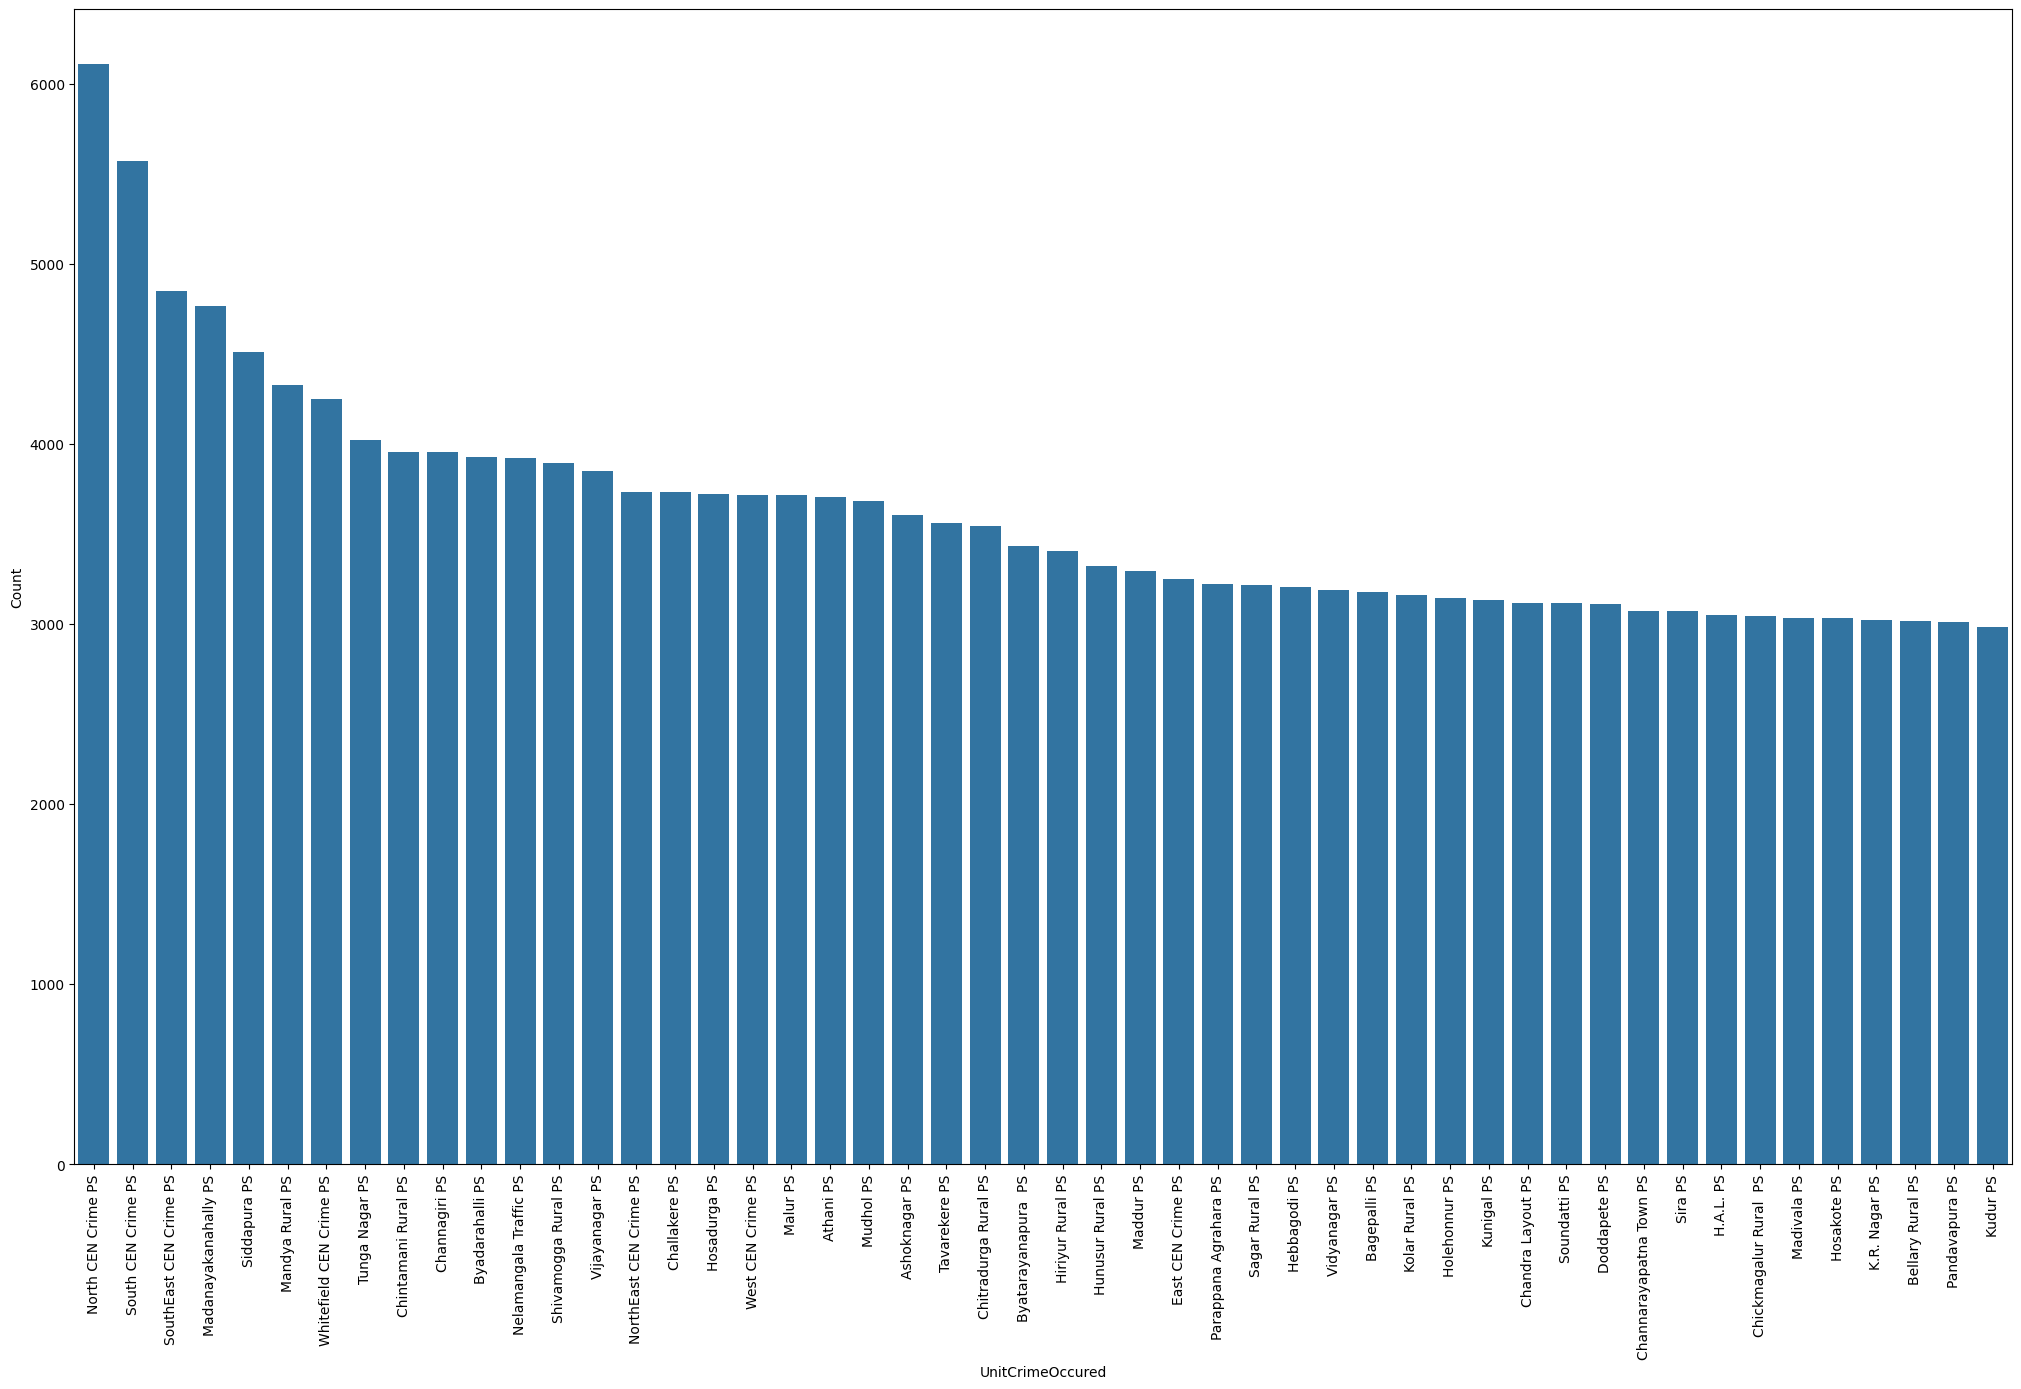

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

# Assuming df is your DataFrame
df5 = pd.DataFrame(columns=['UnitCrimeOccured'])
df5["UnitCrimeOccured"] = [each for each in df.UnitName.unique()]
df5["Count"] = [len(df[df.UnitName == each]) for each in df5.UnitCrimeOccured]
df5 = df5.sort_values(by=['Count'], ascending=False)

plt.figure(figsize=(25, 15))
sns.barplot(x=df5.UnitCrimeOccured.head(50), y=df5.Count.head(50))
plt.xticks(rotation=90)
plt.xlabel('UnitCrimeOccured')
plt.ylabel('Count')

# Convert the plot to an interactive HTML element
html_str = mpld3.fig_to_html(plt.gcf())

# Save the HTML string to a file
with open("UnitCrimeOccured.html", "w") as f:
    f.write(html_str)


In [45]:
len(df.Complaint_ID.unique())

11535

### Hence these are the number of complaints recieved in each district

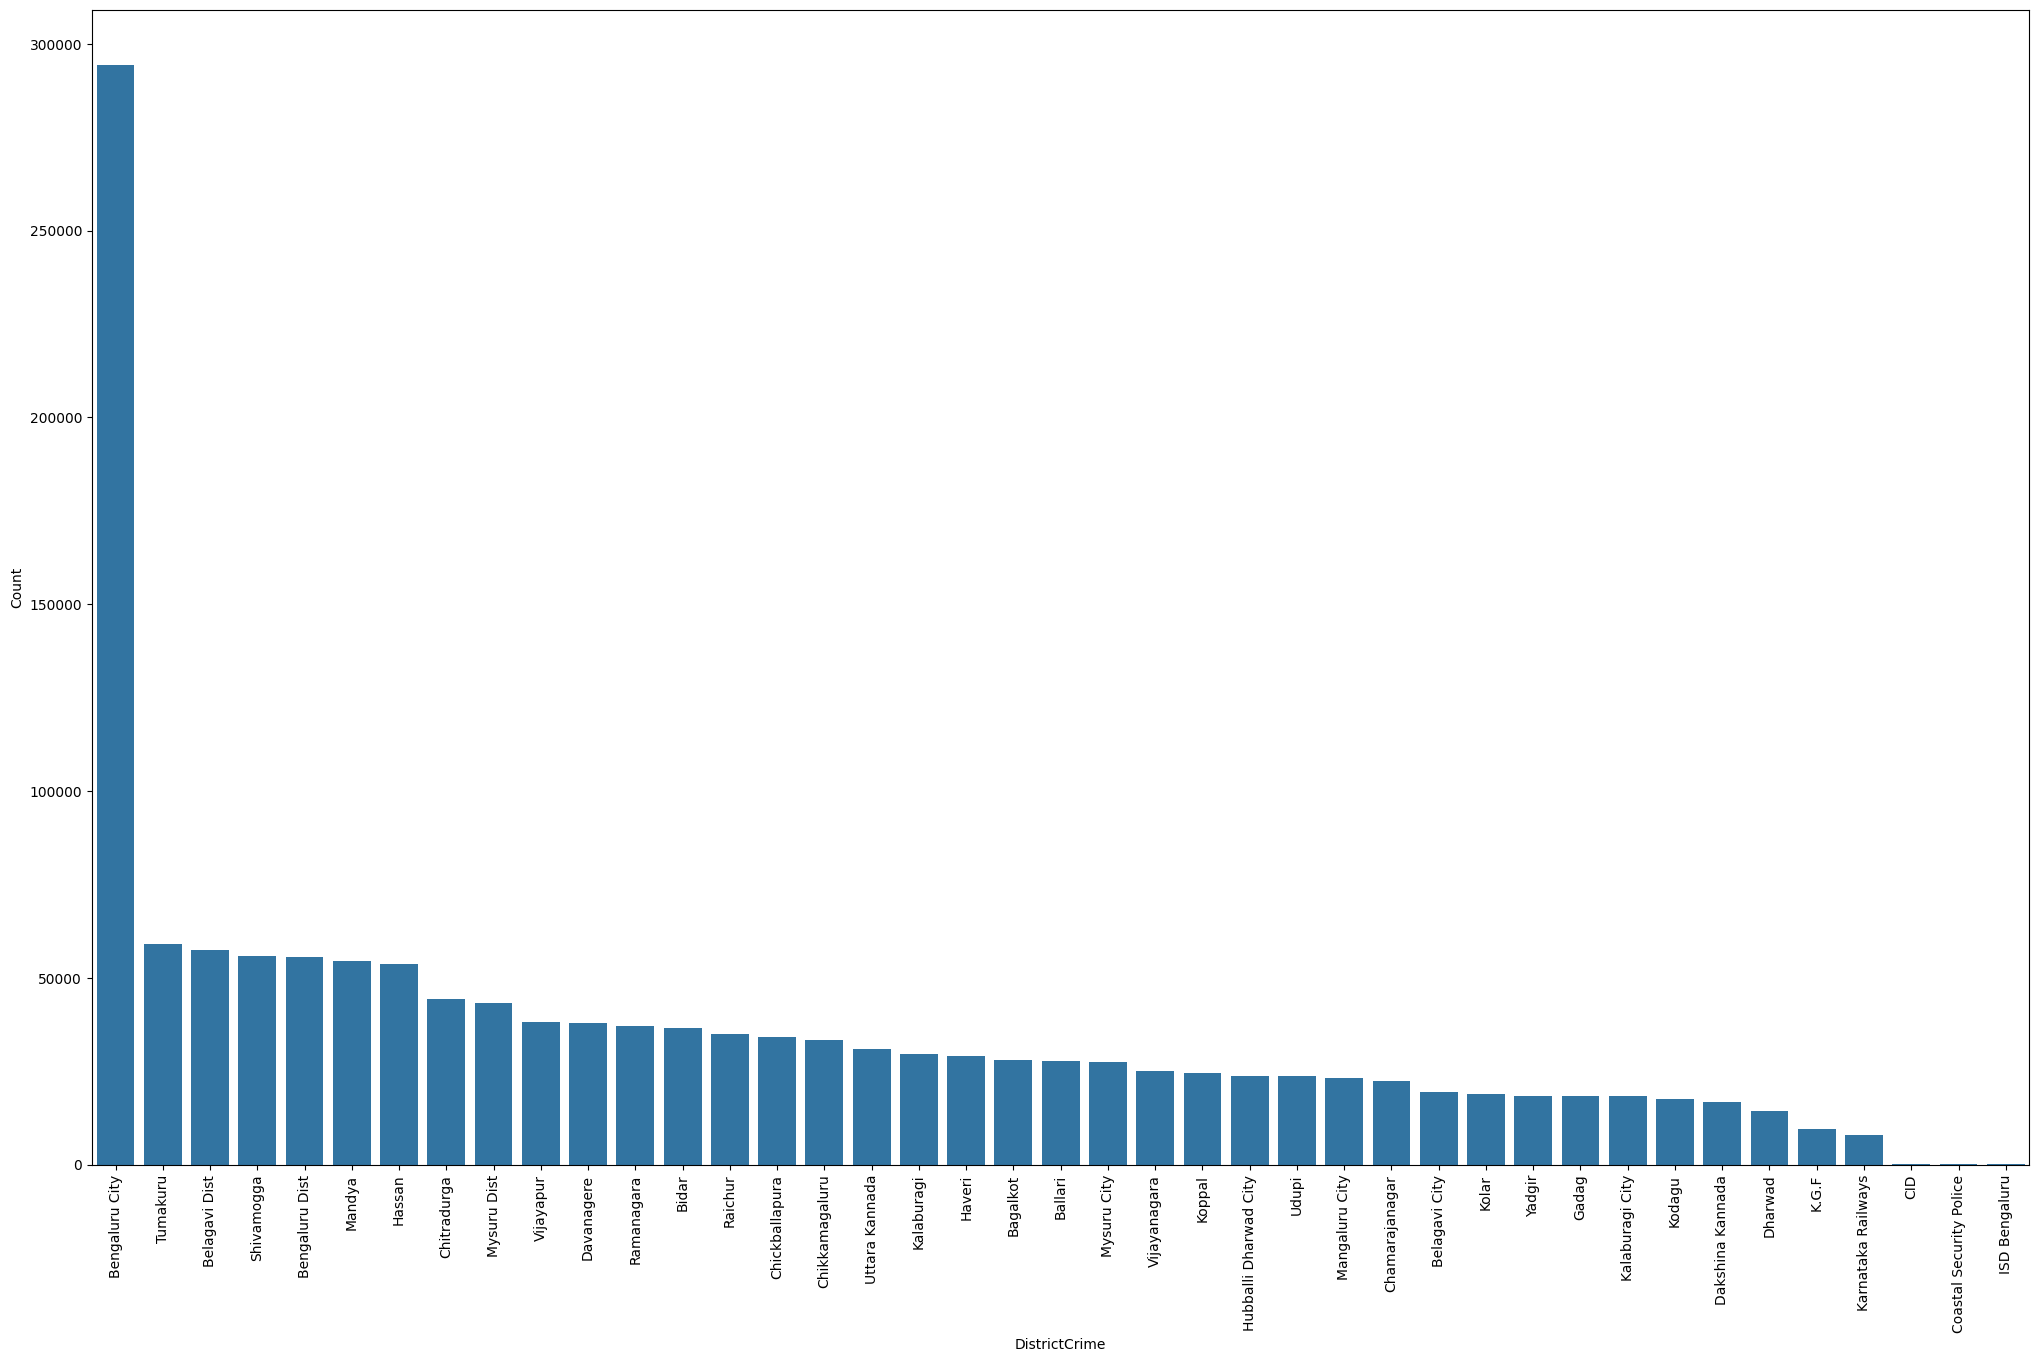

<Figure size 640x480 with 0 Axes>

In [46]:
df5 = pd.DataFrame(columns = ['DistrictCrime'])
df5["DistrictCrime"]=[each for each in df.District_Name.unique()]
df5["Count"]=[len(df[df.District_Name==each]) for each in df5.DistrictCrime]
df5=df5.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df5.DistrictCrime.head(50), y=df5.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('DistrictCrime')
plt.ylabel('Count')
plt.show()
plt.savefig("")

### Relation between the age and the crime commited

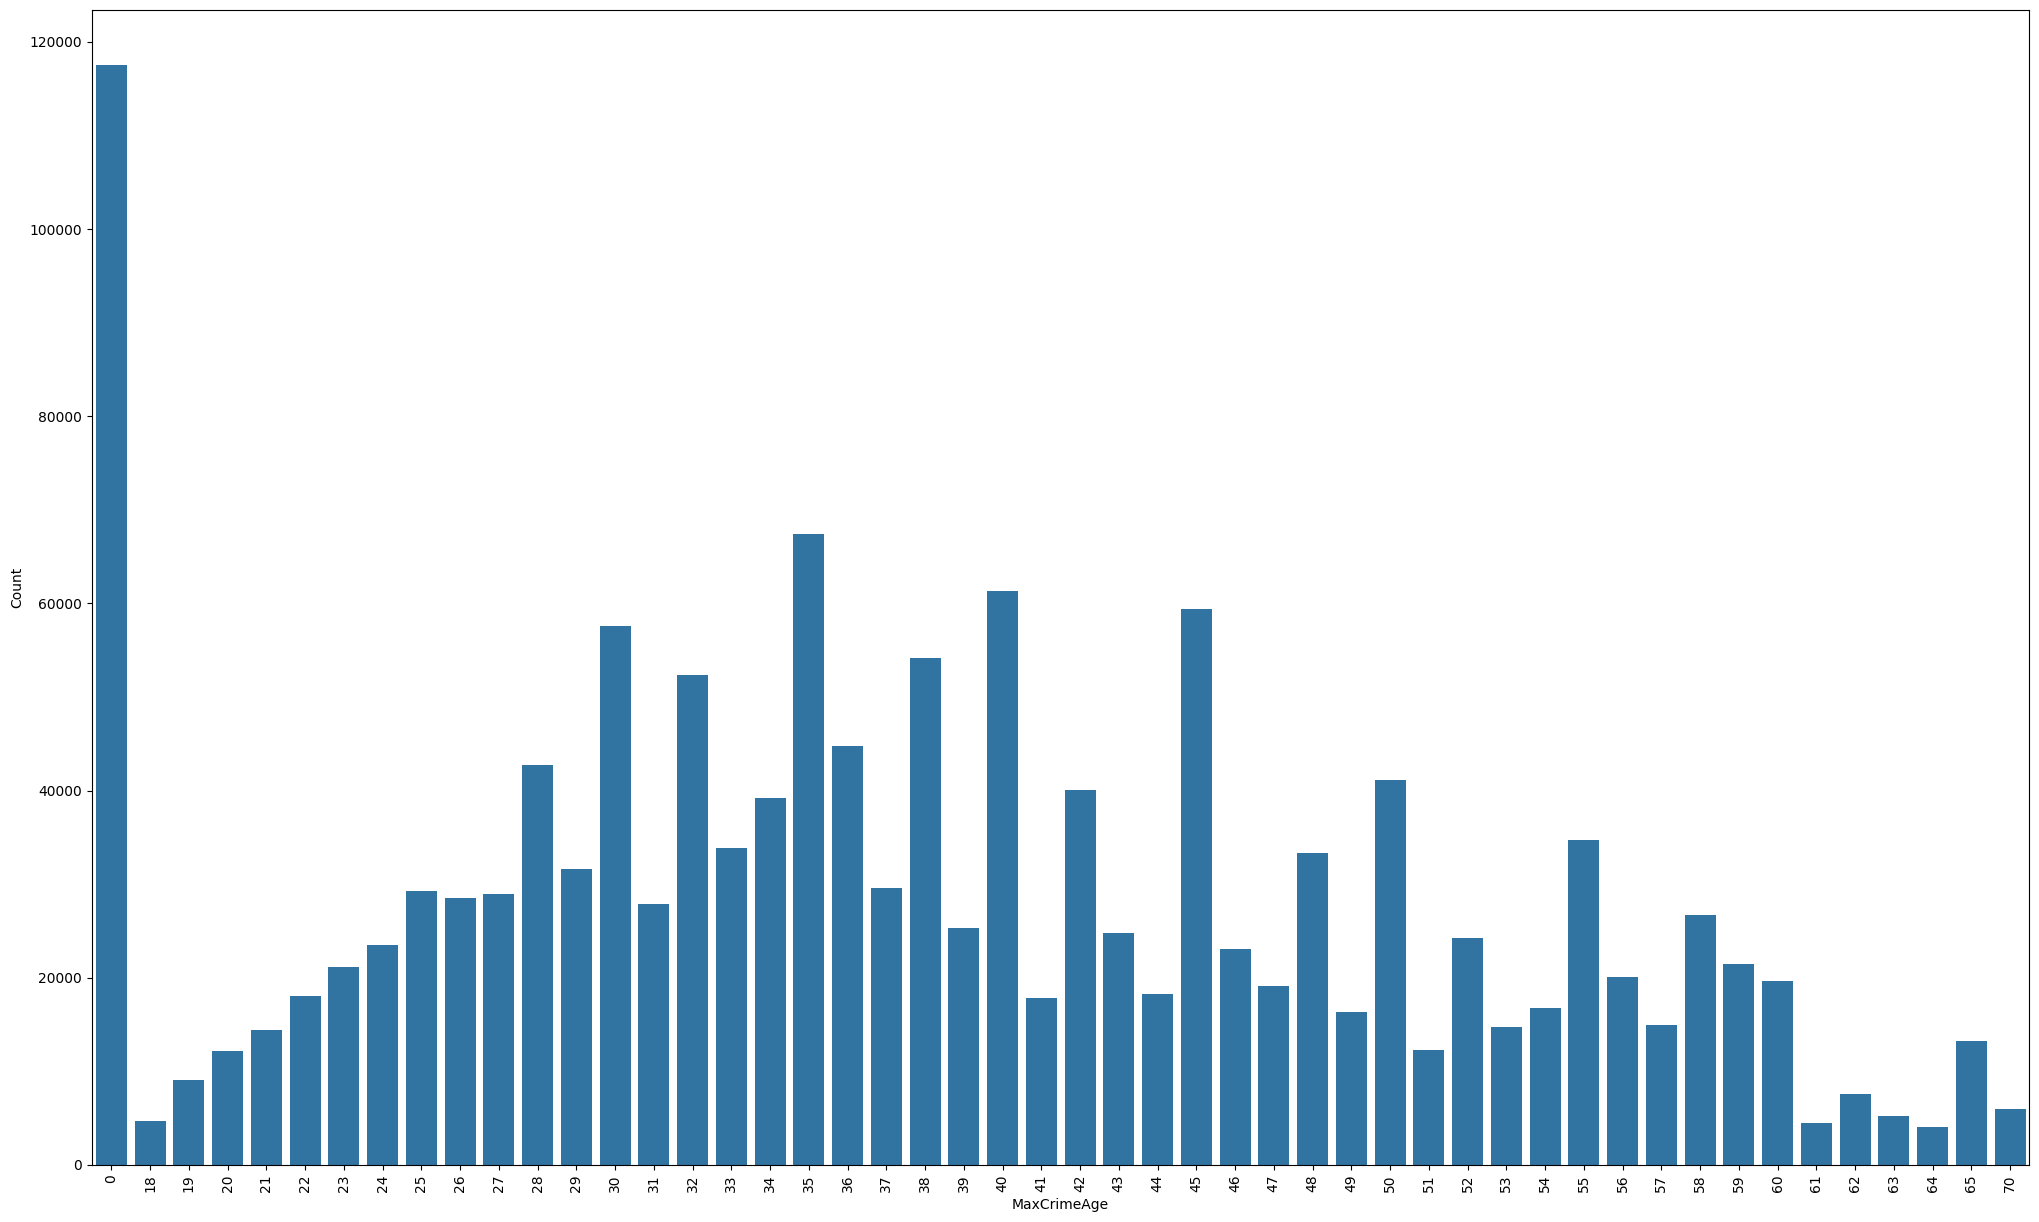

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

# Assuming df is your DataFrame
df5 = pd.DataFrame(columns=['MaxCrimeAge'])
df5["MaxCrimeAge"] = [each for each in df.Age.unique()]
df5["Count"] = [len(df[df.Age == each]) for each in df5.MaxCrimeAge]
df5 = df5.sort_values(by=['Count'], ascending=False)

plt.figure(figsize=(25, 15))
sns.barplot(x=df5.MaxCrimeAge.head(50), y=df5.Count.head(50))
plt.xticks(rotation=90)
plt.xlabel('MaxCrimeAge')
plt.ylabel('Count')

# Convert the plot to an interactive HTML element
html_str = mpld3.fig_to_html(plt.gcf())

# Save the HTML string to a file
with open("MaxCrimeAge.html", "w") as f:
    f.write(html_str)


## Hence in the year 2023 we have the most number of crimes

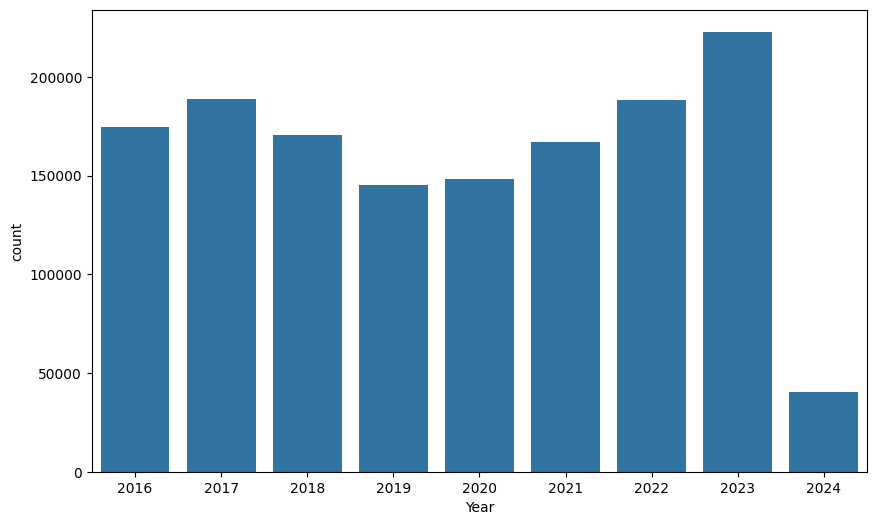

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Year' column to categorical type
df['Year'] = df['Year'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.show()




In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446518 entries, 0 to 1696391
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   District_Name    1446518 non-null  object        
 1   UnitName         1446518 non-null  object        
 2   FIRNo            1446518 non-null  object        
 3   Year             1446518 non-null  category      
 4   Month            1446518 non-null  int64         
 5   ComplainantName  1446518 non-null  object        
 6   DateOfBirth      1446518 non-null  datetime64[ns]
 7   Age              1446518 non-null  int64         
 8   Sex              1446518 non-null  float64       
 9   Nationality      1446518 non-null  object        
 10  Occupation       1446518 non-null  object        
 11  Address          1446518 non-null  object        
 12  City             1446518 non-null  object        
 13  State            1446518 non-null  object        
 14  FIR_ID 

In [50]:
df=df.replace([0],np.nan)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446518 entries, 0 to 1696391
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   District_Name    1446518 non-null  object        
 1   UnitName         1446518 non-null  object        
 2   FIRNo            1446518 non-null  object        
 3   Year             1446518 non-null  category      
 4   Month            1446518 non-null  int64         
 5   ComplainantName  1446518 non-null  object        
 6   DateOfBirth      1446518 non-null  datetime64[ns]
 7   Age              1328982 non-null  float64       
 8   Sex              1446518 non-null  float64       
 9   Nationality      1446518 non-null  object        
 10  Occupation       1446518 non-null  object        
 11  Address          1446518 non-null  object        
 12  City             1446518 non-null  object        
 13  State            1446518 non-null  object        
 14  FIR_ID 

In [52]:
df.Age.isnull().sum()

117536

In [53]:
round_Values = round(df.Age.mean())
df.Age.fillna(round_Values,inplace=True)

C:\Users\bsj\AppData\Local\Temp\ipykernel_1268\368185952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(round_Values,inplace=True)


In [54]:
df.Age.isnull().sum()

0

In [55]:
df.isnull().sum()

District_Name      0
UnitName           0
FIRNo              0
Year               0
Month              0
ComplainantName    0
DateOfBirth        0
Age                0
Sex                0
Nationality        0
Occupation         0
Address            0
City               0
State              0
FIR_ID             0
Unit_ID            0
Complaint_ID       0
dtype: int64

In [56]:
df['Age'] = df['Age'].apply(lambda x: 15 if 1 <= x <= 10 else (95 if x > 100 else x))

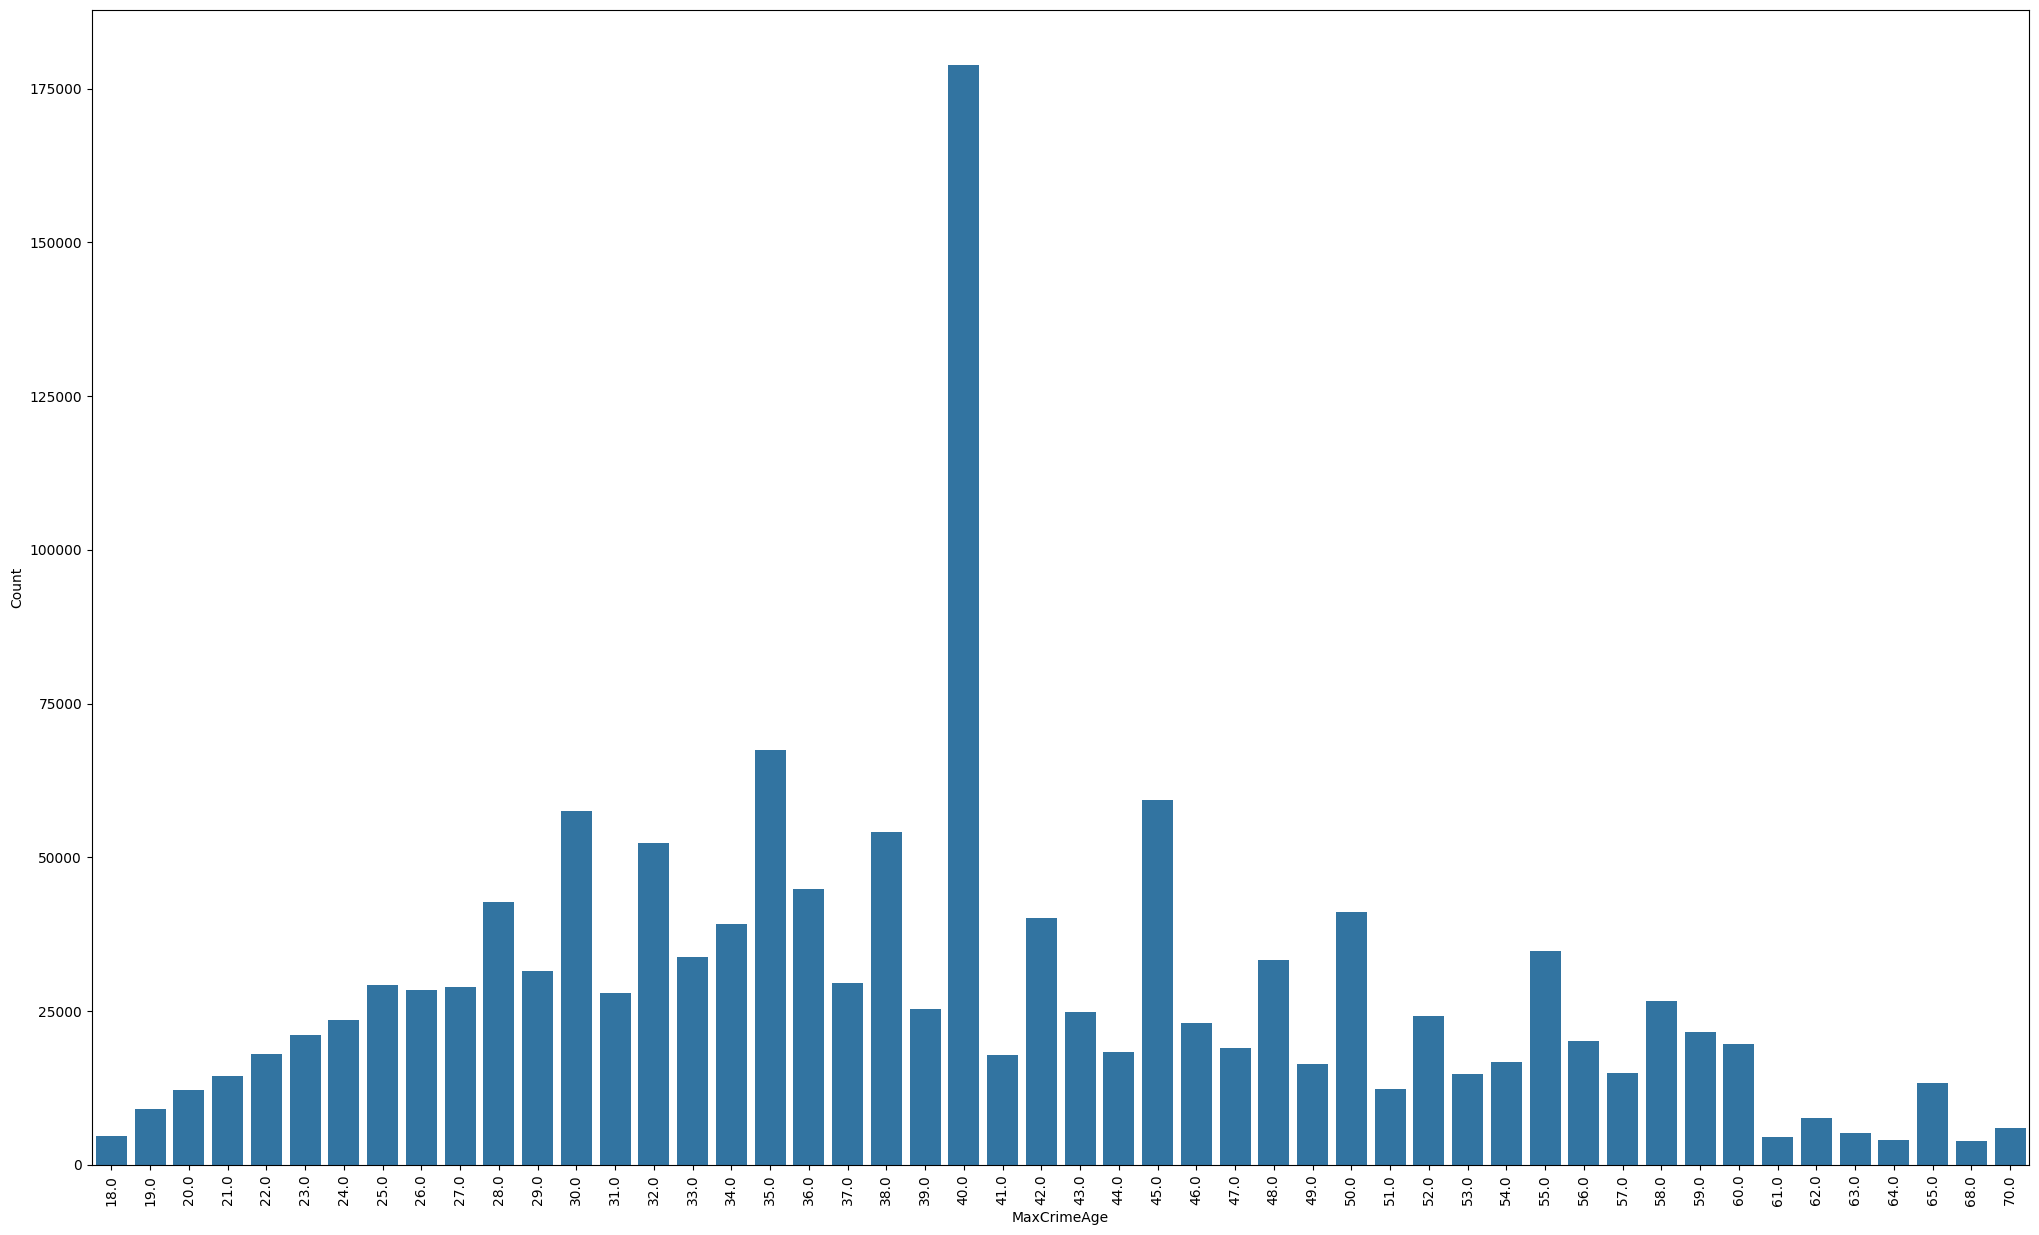

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

# Assuming df is your DataFrame
df5 = pd.DataFrame(columns=['MaxCrimeAge'])
df5["MaxCrimeAge"] = [each for each in df.Age.unique()]
df5["Count"] = [len(df[df.Age == each]) for each in df5.MaxCrimeAge]
df5 = df5.sort_values(by=['Count'], ascending=False)

plt.figure(figsize=(25, 15))
sns.barplot(x=df5.MaxCrimeAge.head(50), y=df5.Count.head(50))
plt.xticks(rotation=90)
plt.xlabel('MaxCrimeAge')
plt.ylabel('Count')

# Convert the plot to an interactive HTML element
html_str = mpld3.fig_to_html(plt.gcf())

# Save the HTML string to a file
with open("MaxCrimeAge.html", "w") as f:
    f.write(html_str)


<Axes: ylabel='count'>

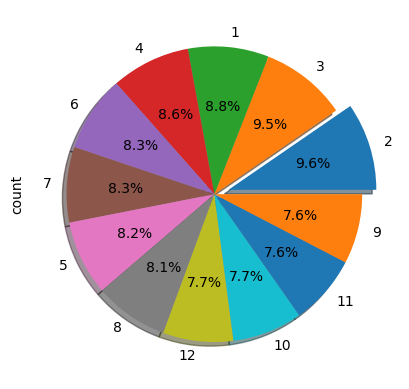

In [58]:
month_counts = df['Month'].value_counts()

# Create an explode list with the same length as the number of unique 'Month' values
explode = [0.1 if i == month_counts.idxmax() else 0 for i in month_counts.index]

# Plot the pie chart
df['Month'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True)

In [59]:
df.Age.unique()

array([ 40.,  48.,  59.,  27.,  52.,  20.,  32.,  35.,  53.,  50.,  46.,
        44.,  29.,  31.,  30.,  33.,  28.,  42.,  55.,  56.,  58.,  34.,
        25.,  51.,  45.,  54.,  43.,  22.,  18.,  49.,  47.,  41.,  62.,
        65.,  26.,  37.,  60.,  19.,  70.,  39.,  68.,  38.,  69.,  24.,
        36.,  21.,  75.,  57.,  23.,  61.,  72.,  80.,  74.,  63.,  71.,
        66.,  67.,  64.,  15.,  16.,  76.,  17.,  78.,  77.,  86.,  73.,
        85.,  84.,  79.,  82.,  83.,  87.,  12.,  13.,  14.,  95.,  11.,
        91.,  90.,  81.,  89., 100.,  92.,  94.,  96.,  88.,  98.,  97.,
        93.])

C:\Users\bsj\AppData\Local\Temp\ipykernel_1268\3512174998.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_month_counts = df.groupby(['Year', 'Month']).size().unstack().fillna(0)


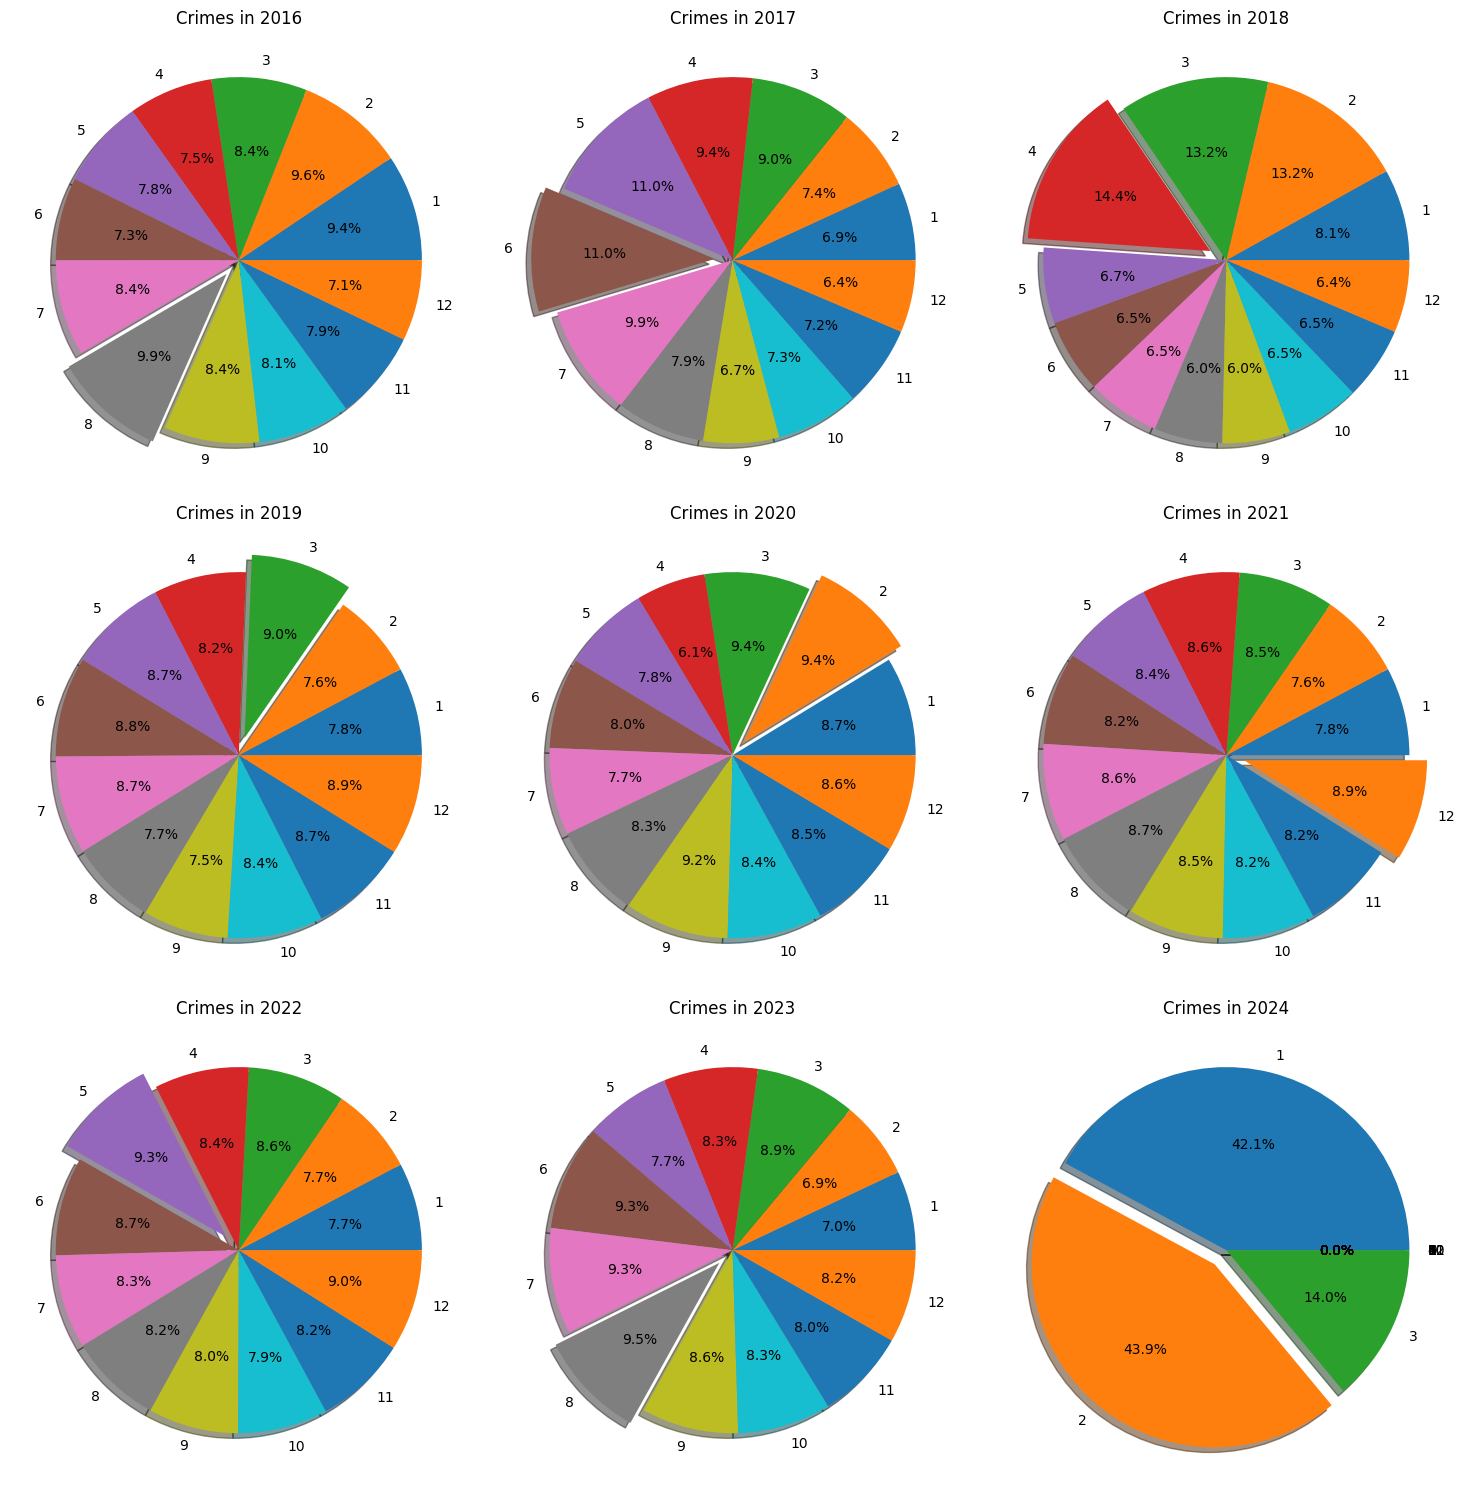

In [60]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the crime data

# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by 'Year' and 'Month' and count the number of occurrences
year_month_counts = df.groupby(['Year', 'Month']).size().unstack().fillna(0)

# Plot pie charts for each year horizontally in three rows with three charts per row
years = year_month_counts.index
num_rows = 3
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    month_counts = year_month_counts.loc[year]
    explode = [0.1 if month == month_counts.idxmax() else 0 for month in month_counts.index]
    axs[row, col].pie(month_counts, labels=month_counts.index, explode=explode, autopct='%1.1f%%', shadow=True)
    axs[row, col].set_title(f'Crimes in {year.year}')

# Remove empty subplots
for i in range(len(years), num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()




In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df is your DataFrame containing the crime data

# Convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by 'Year' and 'Month' and count the number of occurrences
year_month_counts = df.groupby(['Year', 'Month']).size().unstack().fillna(0)

# Create a subplot with 3 rows and 3 columns
fig = make_subplots(rows=3, cols=3, subplot_titles=[f'Crimes in {year.year}' for year in year_month_counts.index],
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}],
                           [{'type':'pie'}, {'type':'pie'}, {'type':'pie'}],
                           [{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]])

# Add pie charts for each year to the subplot
for i, year in enumerate(year_month_counts.index, start=1):
    month_counts = year_month_counts.loc[year]
    labels = month_counts.index
    values = month_counts.values
    fig.add_trace(
        go.Pie(labels=labels, values=values, hole=0.4, textinfo='percent', hoverinfo='label+percent', 
               title=f'Crimes in {year.year}'),
        row=(i-1) // 3 + 1, col=(i-1) % 3 + 1
    )

# Update layout
fig.update_layout(title_text="Crime Distribution of each Year", title_x=0.5, showlegend=False, width=1000, height=1000)

# Save the plot as an HTML file
fig.write_html("crime_distribution.html")


C:\Users\bsj\AppData\Local\Temp\ipykernel_1268\3509202199.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [62]:


df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 1446518 entries, 0 to 1696391
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   District_Name    1446518 non-null  object        
 1   UnitName         1446518 non-null  object        
 2   FIRNo            1446518 non-null  object        
 3   Year             1446518 non-null  category      
 4   Month            1446518 non-null  int64         
 5   ComplainantName  1446518 non-null  object        
 6   DateOfBirth      1446518 non-null  datetime64[ns]
 7   Age              1446518 non-null  float64       
 8   Sex              1446518 non-null  float64       
 9   Nationality      1446518 non-null  object        
 10  Occupation       1446518 non-null  object        
 11  Address          1446518 non-null  object        
 12  City             1446518 non-null  object        
 13  State            1446518 non-null  object        
 14  FIR_ID 

In [63]:
complaint_df=df


In [64]:
df.to_csv('preprocessed_df2.csv', index=False)

In [65]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Count the number of unique values in each column
unique_counts = df.nunique()

# Get the total number of rows in the DataFrame
total_rows = len(df)

# Identify columns with unique values (number of unique values equals total rows)
unique_columns = unique_counts[unique_counts == total_rows].index.tolist()

print("Columns with unique values across all rows:", unique_columns)

Columns with unique values across all rows: []


In [66]:
df['FIRNo'].nunique()

11249